*This notebook was created by Sergey Tomin (sergey.tomin@xfel.eu). Source and license info is on [GitHub](https://github.com/ocelot-collab/ocelot). June 2018.*

### FODO in thin lens approximation 
Let's consider the fodo cell of the SASE undulator 

<img src="fodo.png" />

Introducing $d = L_{cell}/2$ as the distance between defocusing and focusing quadrupoles.

We neglect focusing effect in the vertical plan of the horizontal planar undulator.

The transfer matrix of the quadrupole in thin lens approximation:
$$
\begin{equation}
M_f = 
\begin{bmatrix}
    1 & 0 \\
    1/f & 1 
\end{bmatrix}
\end{equation}
$$
where $f = 1/kl$ is focal length, $k$ is quad strength and $l$ is the quad length. 

Drift:
$$
\begin{equation}
M_d = 
\begin{bmatrix}
    1 & d \\
    0 & 1 
\end{bmatrix}
\end{equation}
$$

In [3]:
%matplotlib inline
import sympy as sp 

<a id='half_cell'></a>
Calculate the matrix for a half cell, starting in the middle of a defocusing quadrupole and ending in the meddile of a focusing lens. 

And denotes $f_h = 2 f$ focal length of the half quadrupole

In [4]:
fh, d = sp.symbols("fh, d")

Mqf = sp.Matrix([[1, 0],[-1/fh, 1]])
Md = sp.Matrix([[1, d],[0, 1]])
Mqd = sp.Matrix([[1, 0],[1/fh, 1]])
M1 = Mqf*Md*Mqd
sp.simplify(M1)

Matrix([
[(d + fh)/fh,            d],
[   -d/fh**2, (-d + fh)/fh]])

For second half cell $f_h \to -f_h$

In [5]:
M2 = sp.Matrix([
[(d - fh)/-fh,           d],
[    -d/fh**2, (-d -fh)/-fh]])
M_cell = sp.simplify(M1*M2)
M_cell

Matrix([
[ -2*d**2/fh**2 + 1,   2*d*(d + fh)/fh],
[2*d*(d - fh)/fh**3, -2*d**2/fh**2 + 1]])

#### Phase advance and stability of the FODO cell

Phase advance is related to the transfer matrix by:
$$
\cos \phi_{cell} = \frac{1}{2}Trace(M_{cell}) 
$$
Stability requares:
$$
\left|Trace(M_{cell})\right| < 2
$$

In [6]:
trace_M = sp.simplify(M_cell[0,0] + M_cell[1,1])
trace_M

-4*d**2/fh**2 + 2

#### Phase advance:
$$
\cos \phi_{cell} = \frac{1}{2}Trace(M_{cell}) = \frac{1}{2} \Big(2 - \frac{4 d^2}{f_h^2}\Big) = 1 - \frac{2 d^2}{f_h^2} = 1 - 2\frac{L_{cell}^2}{16 f^2}
$$

using trigonometric double-angle formulae:
$$
\cos 2\phi = 1-2\sin^2 \phi
$$
and finally 
$$
\boxed{\sin \phi_{cell}/2 =  \frac{L_{cell}}{4f}}
$$
#### Stability 
$$
\left| 2 - \frac{4 d^2}{f_h^2}\right| < 2
$$
rewriting 
$$
0 < \frac{4 d^2}{f_h^2} < 4 \qquad \to \qquad f_h > d
$$
Finally 
$$
\boxed{f > \frac{L_{cell}}{4}}
$$

### $\beta$ - functions

General solution of the Hill's equation $x'' + K(s)x = 0$:

\begin{equation}
\begin{cases}
x(s) = \sqrt{\varepsilon \beta(s)}\cos(\phi(s) + \phi)\\
x'(s) = -\sqrt{\frac{\varepsilon}{\beta(s)}}\Big(\alpha(s)\cos(\phi(s) + \phi) + \sin(\phi(s) + \phi)\Big)
\end{cases}
\end{equation}

Applying initial conditions at the point $s(0) = s_0$ with $\phi(0) = 0$ and the particle coordinates $x_0, x'_0$, we will get:

\begin{equation}
\begin{cases}
\cos\phi = \frac{x_0}{\sqrt{\varepsilon \beta_0}}\\
\sin\phi = -\frac{1}{\sqrt{\varepsilon}}\Big( \frac{\alpha_0}{\sqrt{\beta_0}}x_0 + \sqrt{\beta_0}x'_0\Big)
\end{cases}
\end{equation}
inserting the result into the equation above:
\begin{equation}
\begin{bmatrix}
    x_1  \\
    x'_1 
\end{bmatrix} = 
\begin{bmatrix}
    \sqrt{\frac{\beta_1}{\beta_0}}(\cos\phi_{0\to1} + \alpha_0\sin\phi_{0\to1}) & \sqrt{\beta_1\beta_0}\sin\phi_{0\to1})\\
    \frac{(\alpha_0 - \alpha_1)\cos\phi_{0\to1} - (1 + \alpha_0\alpha_2)\sin\phi_{0\to1}}{\sqrt{\beta_1\beta_0}} & \sqrt{\frac{\beta_0}{\beta_1}}(\cos\phi_{0\to1} - \alpha_1\sin\phi_{0\to1})
\end{bmatrix}
\cdot
\begin{bmatrix}
    x_0  \\
    x'_0 
\end{bmatrix}
\end{equation}

Now consider half of the FODO cell (see picture above) ($\phi_{0\to1} = \phi_{cell}/2$) and $\beta_0 = \beta_{min}$ and  $\beta_1 = \beta_{max}$ (we consider horizantal plane) and remembering that in the middle of the quads $\alpha = 0$. From another side, we have already calculated the transfer matrix for [a half of FODO cell](#half_cell). Collecting all together:

\begin{equation} 
\begin{bmatrix}
    \sqrt{\frac{\beta_{max}}{\beta_{min}}}\cos\frac{\phi_{cell}}{2} & \sqrt{\beta_{max}\beta_{min}}\sin\frac{\phi_{cell}}{2}\\
    -\frac{\sin\frac{\phi_{cell}}{2}}{\sqrt{\beta_{max}\beta_{min}}} & \sqrt{\frac{\beta_{min}}{\beta_{max}}}\cos\frac{\phi_{cell}}{2}
\end{bmatrix};
\qquad
\begin{bmatrix}
    1 + d/f_h &   d \\
  -d/f_h^2 & 1 - d/f_h 
\end{bmatrix}
\end{equation}

after some gymnastics with trigonometrics identities (and taing into account $\sin \phi_{cell}/2 = \frac{d}{f_h}= \frac{L_{cell}}{4f}$)

$$
\beta_{max} = \frac{1 + \sin \frac{\phi_{cell}}{2}}{\sin\phi_{cell}}L_{cell}
$$

$$
\beta_{min} = \frac{1 - \sin \frac{\phi_{cell}}{2}}{\sin\phi_{cell}}L_{cell}
$$
If we neglect the fact the beta function in the drift space takes the form of a quadratic function ($\beta(s) = \beta_0 - 2\alpha_0 s + \gamma_0 s^2$) and assume instead a linear behaviour, the average $\beta$-function will be
$$
\overline \beta \approx \frac{\beta_{max} + \beta_{min}}{2} = \frac{L_{cell}}{\sin\phi_{cell}}
$$

What means that minimum average beta-function will be with phase advance $\phi_{cell} = 90^0$. For SASE1 undulator $L_{cell} = 12.2$ and taking into account that our calulations were done with some level aproximation:
$$
\overline \beta_{min} \approx \frac{12.2 m}{\sin 90^0} = 12.2 m
$$


### More accurate solution
Taking into account quadratic shape of the $\beta$ in the drift space and go through some simple steps, finally we will get more exact solution:
1. Twiss parameters transformation 
\begin{equation}
\begin{bmatrix}
    \beta  \\
    \alpha \\
    \gamma
\end{bmatrix}_1 = 
\begin{bmatrix}
    C^2 & -2SC & S^2\\
    -C C' & SC' + S'C & -SS'\\
    C'^2 & -2 S'C' & S'^2
\end{bmatrix}
\cdot
\begin{bmatrix}
    \beta  \\
    \alpha \\
    \gamma
\end{bmatrix}_0
\end{equation}
Where $C,S, C', S'$ are elements of the transfer matrix
\begin{equation}
M = 
\begin{bmatrix}
    C & S \\
    C' & S' 
\end{bmatrix}
\end{equation}

2. twiss parameters after the thin quadrupole:
$$
\beta_1 = \beta_0 \\
\alpha_1 = -\frac{\beta_0}{f} + \alpha_0 \\
\gamma_1 = \frac{1}{f^2} - 2 \frac{\alpha_0}{f} + \gamma_0
$$
In the middle of the quadrupole $\alpha_0 = 0$ then
$$
\alpha_1 = -\frac{\beta_0}{f_h}
$$
3. In the drift space $\beta$ behave:
$$
\beta(s) = \beta_0 - 2\alpha_0 s + \gamma_0 s^2
$$
4. Because FODO cell is symetric and we are considering the thin lens approximation the average $\overline \beta$ is:
$$
\overline \beta = \frac{2}{L}\int_0^{L/2}\left(\beta_0 - 2\alpha_0 s + \gamma_0s^2 \right)ds = \beta_0 - \frac{\alpha_0 L}{2} + \gamma_0\frac{L^2}{12}
$$
5. Inserting expression for $\beta_{min}$ and express focal length against the phase advance we will get:
$$
\boxed{\overline \beta = \frac{L}{6 \sin\phi_{cell}}\big(5 + \cos\phi_{cell} \big)}
$$
*The result looks simple, probably this expression can be found in some handbooks.*

The minimum possible average $\overline\beta_{min}$ will be with $\frac{d \overline \beta}{d\phi_{cell}} = 0$ what gives us $\phi_{cell} = \pi - \arctan 2\sqrt 6 \approx 101^0$. 

And for our case $L_{cell} = 12.2 m$ it will be 
$$
\overline \beta_{min}  \approx 9.96
$$

Might be useful to find condition for minimum possible $\beta_{max}$ 
$$
\frac{d}{d\phi}\beta_{max} = 0
$$

In [7]:
phi = sp.Symbol("phi")
sp.diff((1 + sp.sin(phi/2))/sp.sin(phi), phi)

-(sin(phi/2) + 1)*cos(phi)/sin(phi)**2 + cos(phi/2)/(2*sin(phi))

In [8]:
import numpy as np
from scipy.optimize import root
from matplotlib import pyplot as plt
fun = lambda phi: -(np.sin(phi/2) + 1)*np.cos(phi)/np.sin(phi)**2 + np.cos(phi/2)/(2*np.sin(phi))
res = root(fun, 0.1)
print("Cell phase advance for minimum possible bmax: phi = ", res.x*180/np.pi)

Cell phase advance for minimum possible bmax: phi =  [76.34541525]


### SASE1 undulator. Numerical simulation


initializing ocelot...


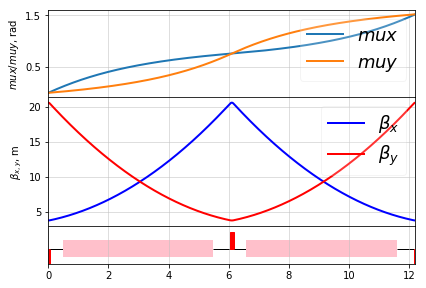

In [9]:
%matplotlib inline

from ocelot import *
from ocelot.gui.accelerator import *
from scipy.integrate import simps
from ocelot.cpbd import optics

d1 = Drift(l=0.43065, eid='d1')
d2 = Drift(l=0.55565, eid='d2')
l = 0.1137
k = 2*0.1137/l

qd = Quadrupole(l=l/2, k1=-k, tilt=0.0)
qf = Quadrupole(l=l, k1=k, tilt=0.0)
K = 3
u40 = Undulator(lperiod=0.04, nperiods=125, Kx=K, Ky=0.0)
m1 = Marker()
m2 = Marker()
fodo_cell = [m1, qd, d1, u40, d2, qf, d1, u40, d2, qd, m2]
fodo_lat = MagneticLattice(fodo_cell)

tws = twiss(fodo_lat, nPoints=1000)

plot_opt_func(fodo_lat, tws, top_plot=["mux", "muy"], legend=False)
plt.show()

min(beta_av) =  9.991836064058338 m


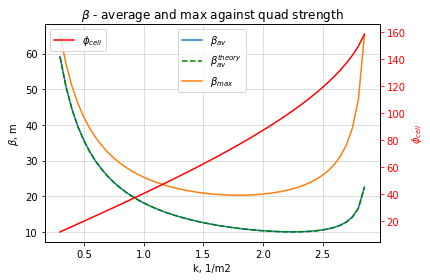

In [10]:
def beta(k):
    qd.k1 = -k
    qf.k1 = k
    fodo_lat.update_transfer_maps()
    tws = twiss(fodo_lat, nPoints=1000)
    bx = np.array([tw.beta_x for tw in tws])
    s = np.array([tw.s for tw in tws])
    bx_av = simps(bx, s)/fodo_lat.totalLen
    phi = tws[-1].mux
    L = fodo_lat.totalLen
    bx_av_th = L/6 * (5 + np.cos(phi))/np.sin(phi)
    return bx_av, bx.max(), bx.min(), tws[-1].mux*180/np.pi, bx_av_th

k = np.arange(0.3, 2.9, 0.05)
Bx_min = []
Bx_max = []
Bx_av = []
Bx_av_theory = []
Phi = []
for k1 in k:
    bx_av, bx_max, bx_min, phi, bx_av_th = beta(k1)
    Bx_min.append(bx_min)
    Bx_max.append(bx_max)
    Bx_av.append(bx_av)
    Phi.append(phi)
    Bx_av_theory.append(bx_av_th)
    
fig, ax1 = plt.subplots()
plt.title(r"$\beta$ - average and max against quad strength")
ax1.plot(k, Bx_av, label=r"$\beta_{av}$")
ax1.plot(k, Bx_av_theory,"g--", label=r"$\beta_{av}^{theory}$")
ax1.plot(k, Bx_max, label=r"$\beta_{max}$")
ax1.set_ylabel(r"$\beta$, m")
ax1.set_xlabel("k, 1/m2")
plt.legend()
print("min(beta_av) = ", np.min(Bx_av), "m" )
ax2 = ax1.twinx()
ax2.plot(k, Phi, "r", label=r"$\phi_{cell}$")
ax2.set_ylabel(r"$\phi_{cell}$", color='r')
ax2.tick_params('y', colors='r')
plt.legend()
plt.grid(False)
plt.show()

### Limitations

The maximum possible strength of the undulator quadrupoles is  $k_{max} = 1.94729$ what means that we can have minimum average beta-function close to 10m (see the Figure above). 

Now we need to consider the limitations of the matching sections.

## Inverse the task

Find the quad strength and FODO cell params if beta average is defined

### FODO estimator

In [11]:
from scipy.optimize import root

def fodo_estimator(beta_av, Lcell, lq=0.1137):
    fun = lambda phi: Lcell/6 * (5 + np.cos(phi))/np.sin(phi) - beta_av
    res = root(fun, 0.1)
    phi = res.x[0]
    b_av = Lcell/6 * (5 + np.cos(phi))/np.sin(phi)
    f = Lcell/(4*np.sin(phi/2))
    kq = 1/f/lq
    bmax = (1 + np.sin(phi/2))/np.sin(phi)*Lcell
    bmin = (1 - np.sin(phi/2))/np.sin(phi)*Lcell
    return kq, phi, bmin, bmax, b_av
    
kq, phi, bmin, bmax, b_av = fodo_estimator(beta_av=11, Lcell=12.2)
print("k1 = ", kq, "1/m^2")
print("bmin / bmax = ", bmin, "/", bmax, "m")
print("calculated beta_av = ", b_av, "m")
print("phi = ", phi*180/np.pi, "deg")

k1 =  1.771751963648942 1/m^2
bmin / bmax =  4.851965262428619 / 20.314939511625177 m
calculated beta_av =  11.000000000000059 m
phi =  75.8191420392388 deg


### FODO correction due to undulator focusing 

In [12]:
def fodo_correction_SASE1(beta_av=60, K=3):
    kq, phi, bmin, bmax, b_av = fodo_estimator(beta_av=beta_av, Lcell=12.2)
    
    print("Estimation: beta_x = ", np.round(bmin,3), "; beta_y = ", np.round(bmax, 3),
          "; phi = ", np.round(phi*180/np.pi), "grad"
          "; kf/kd = ", np.round(kq, 4),"/", np.round(-kq, 4))
    
    # SASE1 FODO cell
    d1 = Drift(l=0.43065, eid='d1')
    d2 = Drift(l=0.55565, eid='d2')
    qd = Quadrupole(l=0.1137/2, k1=-kq, tilt=0.0)
    qf = Quadrupole(l=0.1137, k1=kq, tilt=0.0)
    u40 = Undulator(lperiod=0.04, nperiods=125, Kx=K, Ky=0.0)
    m1 = Marker()
    m2 = Marker()
    fodo_cell = [m1, qd, d1, u40, d2, qf, d1, u40, d2, qd, m2]
    
    # constraints
    constr = {fodo_cell[-1]: {'mux':phi, "muy":phi}, "periodic": True}

    # variables
    vars = [qf, qd]
    
    tws = Twiss()
    tws.beta_x = bmin
    tws.beta_y = bmax
    tws.E = 14
    
    res = match(MagneticLattice(fodo_cell), constr=constr,tw=tws, 
                vars=vars, max_iter=2000, verbose=False)
    kf, kd = res
    
    qf.k1 = kf
    qd.k1 = kd
    
    fodo_lat = MagneticLattice(fodo_cell)

    tws = twiss(fodo_lat, tws0=tws, nPoints=1000)
    print("Correction: beta_x = ", np.round(tws[0].beta_x, 3), 
          "beta_y = ", np.round(tws[0].beta_y, 3), 
          " kf/kd = ", np.round(kf,4), "/", np.round(kd,4))
    #plot_opt_func(fodo_lat, tws, top_plot=["mux", "muy"], legend=False)
    #plt.show()
    return kf, kd, bmin, bmax

In [13]:
import sys
sys.path.append("/Users/tomins/ownCloud/DESY/repository/ocelot")
from ocelot import *
from ocelot.gui.accelerator import *
import sase1_lattice as sase1

### Current lattice $\overline\beta \approx 32$ m

emit_x  = 0.0
emit_y  = 0.0
beta_x  = 10.506745988156398
beta_y  = 42.02704133328497
alpha_x = 0.676085898798978
alpha_y = -2.1449229692237783
gamma_x = 0.0
gamma_y = 0.0
Dx      = 0.0
Dy      = 0.0
Dxp     = 0.0
Dyp     = 0.0
mux     = 0.0
muy     = 0.0
nu_x    = 0.0
nu_y    = 0.0
E       = 14
s        = 0.0



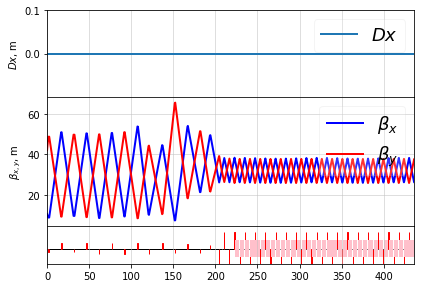

In [14]:
lat = MagneticLattice(sase1.cell)#, stop=sase1.fodo_match)
print(sase1.tws)
#sase1.tws.beta_x = 15
#sase1.tws.beta_y = 50
tws = twiss(lat, tws0=sase1.tws)
plot_opt_func(lat, tws, legend=False)
plt.show()

### $\overline \beta = 60$ m

*Sometimes require run this cell two times to get a correct result*  

Estimation: beta_x =  54.076 ; beta_y =  66.34 ; phi =  12.0 grad; kf/kd =  0.2937 / -0.2937
initial value: x =  [0.29368260023214693, -0.29368260023214693]
Optimization terminated successfully.
         Current function value: 0.000032
         Iterations: 40
         Function evaluations: 79
Correction: beta_x =  54.076 beta_y =  66.34  kf/kd =  0.2648 / -0.2583
initial value: x =  [-0.2244, 0.2309, -0.1911, 0.1653, -0.0881, 0.0953]
Optimization terminated successfully.
         Current function value: 0.000031
         Iterations: 158
         Function evaluations: 279


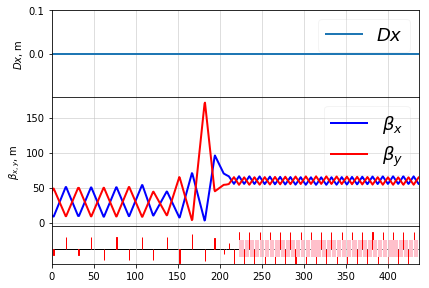

In [17]:
kf, kd, bmin, bmax = fodo_correction_SASE1(beta_av=60, K=3)
# constraints
constr = {sase1.fodo_match: {'beta_x':bmax, "beta_y":bmin, 
                             "alpha_x": 0, "alpha_y": 0}}

quad_limits = {sase1.qf_2177_t2: [-0.654, 0],
             sase1.qf_2192_t2: [0 ,0.654],
             sase1.qf_2207_t2: [-0.654, 0],
             sase1.qf_2218_t2: [0 ,0.654],
             sase1.qa_2229_t2: [-1.94, 0],
             sase1.qa_2235_t2: [0, 1.94]}
# variables
vars = [sase1.qf_2177_t2, sase1.qf_2192_t2,
        sase1.qf_2207_t2, 
        sase1.qf_2218_t2, sase1.qa_2229_t2, sase1.qa_2235_t2]

# because of variables redundancy, we can help a bit to find a more elegant solution 
# *** comment lines or change inital conditions if you want to play with matching
sase1.qf_2177_t2.k1 = -0.2244
sase1.qf_2192_t2.k1 = 0.2309
sase1.qf_2207_t2.k1 = -0.1911
sase1.qf_2218_t2.k1 = 0.1653
sase1.qa_2229_t2.k1 = -0.0881
sase1.qa_2235_t2.k1 = 0.0953

# *** comment lines or change inital conditions if you want to play with matching
lat.update_transfer_maps()

res = match(lat, constr=constr, vars=vars, tw=sase1.tws, max_iter=2000, verbose=False)

sase1.qa_2241_sa1.k1 = kd
sase1.qa_2247_sa1.k1 = kf
sase1.qa_2247_sa1_h.k1 = kf
lat.update_transfer_maps()
tws = twiss(lat, tws0=sase1.tws)
plot_opt_func(lat, tws, legend=False)
plt.show()

#### Checking quads limits

In [18]:
# check quads limits
for q, k in zip(vars, res):
    print(q.id + ".k1 = "+ str(np.round(k,4)) +  ";   strength is OK :",
          quad_limits[q][0]<k<quad_limits[q][1])

QF.2177.T2.k1 = -0.2244;   strength is OK : True
QF.2192.T2.k1 = 0.2309;   strength is OK : True
QF.2207.T2.k1 = -0.1911;   strength is OK : True
QF.2218.T2.k1 = 0.1653;   strength is OK : True
QA.2229.T2.k1 = -0.0881;   strength is OK : True
QA.2235.T2.k1 = 0.0953;   strength is OK : True


### $\overline \beta = 11$ m
*Sometimes require run this cell two times to get a correct result* 

Estimation: beta_x =  4.852 ; beta_y =  20.315 ; phi =  76.0 grad; kf/kd =  1.7718 / -1.7718
initial value: x =  [1.771751963648942, -1.771751963648942]
Optimization terminated successfully.
         Current function value: 0.000035
         Iterations: 33
         Function evaluations: 66
Correction: beta_x =  4.852 beta_y =  20.315  kf/kd =  1.7811 / -1.7755
initial value: x =  [-0.2227, 0.211, -0.2176, 0.2392, -0.9728, 1.3215]
Optimization terminated successfully.
         Current function value: 0.000001
         Iterations: 154
         Function evaluations: 275


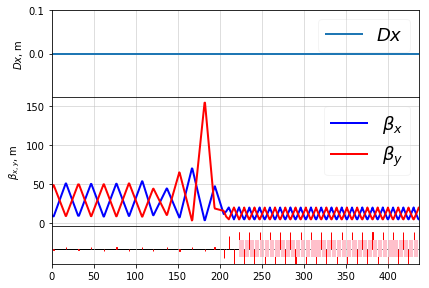

In [21]:
kf, kd, bmin, bmax = fodo_correction_SASE1(beta_av=11, K=3)
# constraints
constr = {sase1.fodo_match: {'beta_x':bmax, "beta_y":bmin, 
                             "alpha_x": 0, "alpha_y": 0}}


# variables
vars = [sase1.qf_2177_t2, sase1.qf_2192_t2, sase1.qf_2207_t2, 
        sase1.qf_2218_t2, sase1.qa_2229_t2, sase1.qa_2235_t2]

# because of variables redundancy, we can help a bit to find a more elegant solution
# *** comment lines or change inital conditions if you want to play with matching
sase1.qf_2177_t2.k1 = -0.2227
sase1.qf_2192_t2.k1 = 0.211
sase1.qf_2207_t2.k1 = -0.2176
sase1.qf_2218_t2.k1 = 0.2392
sase1.qa_2229_t2.k1 = -0.9728
sase1.qa_2235_t2.k1 = 1.3215
# *** comment lines or change inital conditions if you want to play with matching
lat.update_transfer_maps()

res = match(lat, constr=constr, vars=vars, tw=sase1.tws, max_iter=2000, verbose=False)

sase1.qa_2241_sa1.k1 = kd
sase1.qa_2247_sa1.k1 = kf
sase1.qa_2247_sa1_h.k1 = kf
lat.update_transfer_maps()
tws = twiss(lat, tws0=sase1.tws)
plot_opt_func(lat, tws, legend=False)
plt.show()

#### Checking quads limits

In [22]:
# check quads limits
for q, k in zip(vars, res):
    print(q.id + ".k1 = "+ str(np.round(k,4)) +  ";   strength is OK :",
          quad_limits[q][0]<k<quad_limits[q][1])

QF.2177.T2.k1 = -0.2226;   strength is OK : True
QF.2192.T2.k1 = 0.211;   strength is OK : True
QF.2207.T2.k1 = -0.2176;   strength is OK : True
QF.2218.T2.k1 = 0.2393;   strength is OK : True
QA.2229.T2.k1 = -0.9747;   strength is OK : True
QA.2235.T2.k1 = 1.3232;   strength is OK : True
